In [1]:
# data manipulation imports
import pandas as pd
import numpy as np

# data saving imports
import pickle

# custom imports
from regression_class import RedditRegression as RR
from regression_class import TimestampClass
from regression_class import QuantileClass as qc

# stats imports
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
data = pickle.load(open('test_data_crypto_5_days.p', 'rb'))
regression_threads = data['regression_data']
all_data = data['all_data']
threads_started = regression_threads[regression_threads.thread_size > 1]

In [3]:
quantiles = [0.25, 0.5, 0.75]
data_series = threads_started.thread_size

In [4]:
data_array = np.array(data_series).reshape(-1,1)


In [5]:
scaler = StandardScaler().fit(data_array)


In [6]:
data_scaled = scaler.transform(data_array)

In [7]:
data_scaled_df = pd.DataFrame(data_scaled)

array([[<Axes: title={'center': '0'}>]], dtype=object)

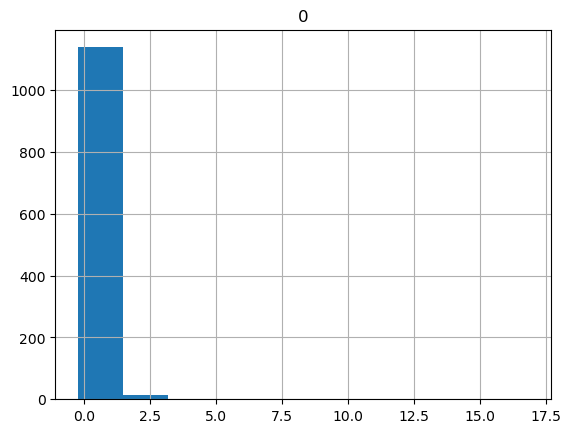

In [8]:
data_scaled_df.hist()

In [9]:
data_scaled_series = data_scaled_df[0]
new_q_vals = qc.get_quantiles(data_scaled_series, quantiles)
new_q_vals

[-0.22727317622200763, -0.17787185552983148, -0.06110509753014236]

In [28]:
q_vals

[8.0, 19.0, 45.0]

In [12]:
q_vals = qc.get_quantiles(data_series, quantiles)
vals_in_qs = qc.get_number_per_quantile(data_series, q_vals)
vals_in_qs

,count
range,
"(7, 2)",287
"(18, 8.0)",286
"(44, 19.0)",295
"(3813, 45.0)",292


In [10]:
new_vals_in_q = qc.get_number_per_quantile(data_scaled_series, new_q_vals)

In [11]:
new_vals_in_q

,count
range,
"(-0.23176420537584183, -0.2542193511450128)",287
"(-0.18236288468366565, -0.22727317622200763)",286
"(-0.06559612668397656, -0.17787185552983148)",295
"(16.86109275411711, -0.06110509753014236)",292


In [15]:
log_data = np.log(data_series)

In [17]:
log_q_vals = qc.get_quantiles(log_data, quantiles)
log_vals_in_qs = qc.get_number_per_quantile(log_data, log_q_vals)
log_vals_in_qs

,count
range,
"(1.9459101490553132, 0.6931471805599453)",287
"(2.8903717578961645, 2.0794415416798357)",286
"(3.784189633918261, 2.9444389791664403)",295
"(8.246171559857563, 3.8066624897703196)",292


In [18]:
log_q_vals

[2.0794415416798357, 2.9444389791664403, 3.8066624897703196]

Scaling the data doesn't change quartiles - this should have been obvious!